In [1]:
import matplotlib.pyplot as plt
import graphviz as gv
import collections 
import heapq
import os

In [2]:
codigo ={}

frec = collections.defaultdict(int)

class nodoMinHeap:
    def __init__(self,sym,frec):
        self.izq=None
        self.der=None
        self.sym=sym
        self.frec=frec
    
    def __lt__(self,other):
        return self.frec<other.frec
    
def printCodigo(raiz,str):
    if raiz is None:
        return
    if raiz.sym !='$':
        print(raiz.sym+':'+str)
    printCodigo(raiz.izq,str+'0')
    printCodigo(raiz.der,str+'1')

def guardaCodigo(raiz,str): 
    if raiz is None:
        return
    if raiz.sym !='$':
        codigo[raiz.sym]=str
    guardaCodigo(raiz.izq,str+'0')
    guardaCodigo(raiz.der,str+'1')

def Huffman():
    global minHeap
    for key in frec:
        minHeap.append(nodoMinHeap(key,frec[key]))
    heapq.heapify(minHeap)
    while len(minHeap)!=1:
        izq = heapq.heappop(minHeap)
        der = heapq.heappop(minHeap)
        top = nodoMinHeap('$',izq.frec+der.frec)
        top.izq = izq
        top.der = der
        heapq.heappush(minHeap,top)
    guardaCodigo(minHeap[0],'')

def calcFrec(string):
    n = len(string)
    for i in range(n):
        frec[string[i]]+=1
        #print(frec)
    return frec

def plotFrec(frec):
    tabla_frecuencia= plt.bar([sym for sym  in frec.keys()], [ cant for cant in frec.values()],fc='Turquoise',ec='Black')
    plt.bar_label(tabla_frecuencia,labels=[cant for cant in frec.values()], label_type='edge',fontsize=12,padding=3)
    plt.title('Frecuencia Caracteres', fontsize=20)
    plt.xlabel('Caracteres')
    plt.ylabel('Frecuencia')
    plt.show()

def printArbolPre(raiz):
    if raiz is None:
        return
    print(raiz.sym,end='') 
    if raiz.izq is None:
        print('-1',end='')
    if raiz.der is None:
        print('-1',end='')
    printArbolPre(raiz.izq)
    printArbolPre(raiz.der)

def writeArbolPre(raiz,fp):    
        if raiz is None:
            return
        fp.write(raiz.sym) 
        if raiz.izq is None:
            fp.write('-1')
        if raiz.der is None:
            fp.write('-1')
        writeArbolPre(raiz.izq,fp)
        writeArbolPre(raiz.der,fp)

def writeCodificado(string,fp):
    codificado=''
    for i in string:
        codificado+=codigo[i]
    fp.write('\n'+codificado)
    return codificado


def mkFile(raiz,str):
    archActual = os.getcwd()
    sub = 'Comprimido'
    file = 'compresion.huf'
    newsub = os.path.join(archActual, sub)
    file_path = os.path.join(newsub, file)
    if not os.path.exists(newsub):
        os.makedirs(newsub)
    with open(file_path, 'w') as fp:
        writeArbolPre(raiz, fp)
        writeCodificado(str,fp)
        
        
def codificar(string):
    codificado=''
    for i in string:
        codificado+=codigo[i]
    print('Codigo Huffman: \n',codificado)
    return codificado

def decodificar_archivo(raiz,s):
    ans=''
    actual=raiz
    n=len(s)
    for i in range(n):
        if s[i]=='0':
            actual=actual.izq
        else:
            actual=actual.der

        if actual.izq is None and actual.der is None:
            ans+=actual.sym
            actual=raiz
    return ans

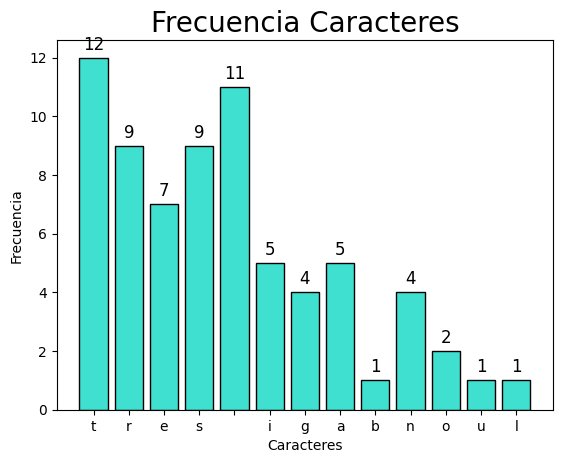

a:000
e:001
g:0100
n:0101
s:011
r:100
i:1010
o:10110
b:101110
l:1011110
u:1011111
 :110
t:111
Codigo Huffman: 
 1111000010111101111001010011111001011110111101001001000010111101111000000100000101110000010111011110010100100101101100010101110101111101011101111001010010000010111101100010101110111100001011110111100101001111100101111011110000001111110110011
Decodificado: 
 tres tristes tigres tragaban trigo en un trigal en tres tristes trastos


In [3]:

if __name__ == '__main__':
    minHeap=[]
    #string='mama amo a mamama'
    string='tres tristes tigres tragaban trigo en un trigal en tres tristes trastos'
    decodificado= ''
    frec= calcFrec(string)
    plotFrec(frec)
    Huffman()
    printCodigo(minHeap[0],'')
    codificado = codificar(string)
   
    decodificado=decodificar_archivo(minHeap[0],codificado)
    print('Decodificado: \n',decodificado)

In [4]:
printArbolPre(minHeap[0])
mkFile(minHeap[0],string)

$$$a-1-1e-1-1$$g-1-1n-1-1s-1-1$$r-1-1$i-1-1$o-1-1$b-1-1$l-1-1u-1-1$ -1-1t-1-1